# Gym demo

Demonstrate the use of the the Gym interface

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import pandas as pd
import glob as glob
import time
import pickle
from omegaconf import OmegaConf

# add custom paths
sys.path.extend([os.path.abspath('./assetto_corsa_gym')])
import AssettoCorsaEnv.assettoCorsa as assettoCorsa

# Configure the logging system
# import logging
# logger = logging.getLogger(__name__)
# logging.basicConfig(
#     level=logging.INFO,  # Set the logging level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
#     format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',  # Format of the log messages
#     datefmt='%Y-%m-%d %H:%M:%S',  # Format of the timestamp
# )



## Load config file

In [10]:
config = OmegaConf.load("config.yml")

# Create env object

In [11]:
env = assettoCorsa.make_ac_env(cfg=config, work_dir="output")


2024-07-30 16:01:42 - AssettoCorsaEnv.ac_env - INFO - Setting track monza
2024-07-30 16:01:42 - AssettoCorsaEnv.ac_client - WARNING - Controls will be executed locally and not by the server
2024-07-30 16:01:43 - AssettoCorsaEnv.track - INFO - Track loaded from: c:\Users\longt\OneDrive\Desktop\lecar-car\car_dynamics\car_dynamics\envs\assetto_corsa\assetto_corsa_gym\AssettoCorsaEnv\../AssettoCorsaConfigs\tracks\monza.csv Found 3760 segments downsampled by 10= 376 segments
2024-07-30 16:01:43 - AssettoCorsaEnv.reference_lap - INFO - Reference Lap. Loading: c:\Users\longt\OneDrive\Desktop\lecar-car\car_dynamics\car_dynamics\envs\assetto_corsa\assetto_corsa_gym\AssettoCorsaEnv\../AssettoCorsaConfigs\tracks\monza-racing_line.csv
2024-07-30 16:01:43 - AssettoCorsaEnv.reference_lap - INFO - Calculating curvature
2024-07-30 16:01:43 - AssettoCorsaEnv.sensors_ray_casting - INFO - spatial_hash len 60
c:\Users\longt\anaconda3\envs\accsim2\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: 

# Show static info

In [13]:
static_info = env.client.simulation_management.get_static_info()
ac_mod_config = env.client.simulation_management.get_config()

# logger.info("Static info:")
# for i in static_info:
#     logger.info(f"{i}: {static_info[i]}")
# logger.info("AC Mod config:")
# for i in ac_mod_config:
#     logger.info(f"{i}: {ac_mod_config[i]}")


# Apply actions and recover the car

In [14]:
states = []

obs = env.reset()

for i in range(100):
    if i % 2 == 0:
        steer = 0.1
    else:
        steer = -0.1
    actions_applied = env.set_actions(np.array([steer, 0.5, -1.]))
    # print(actions_applied)
    next_state, reward, done, info = env.step(action=None)  # action is already applied
    time.sleep(0.01)
    if done:
        break

env.recover_car()
env.close()

2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - Reset AC. Episode 1 total_steps: 0
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - Static info:
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - CarName: ks_mazda_miata
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - isCarInPitlane: 0
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - CAR_WHEELBASE: 2.26677759960923
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - CAR_WHEEL_R: [0.2888000011444092, 0.2888000011444092, 0.2888000011444092, 0.2888000011444092]
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - WindSpeed: 0
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - TrackName: monza
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - WindDirection: 359
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - TrackLength: 5758.66064453125
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - autoShifterOn: 1
2024-07-30 16:01:53 - AssettoCorsaEnv.ac_env - INFO - CAR_TRACK: 1.4271257135756301
2024-07-30

[ 0.01333333 -0.76000001 -1.        ]
[ 0.         -0.52000001 -1.        ]
[ 0.01333333 -0.28000002 -1.        ]
[ 0.         -0.04000002 -1.        ]
[ 0.01333333  0.19999997 -1.        ]
[ 0.          0.43999997 -1.        ]
[ 0.01333333  0.67999996 -1.        ]
[ 0.          0.91999996 -1.        ]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.         -1.        ]
[ 0.  1. -1.]
[ 0.01333333  1.    

2024-07-30 16:02:00 - AssettoCorsaEnv.ac_env - INFO - Terminate episode. is_out_of_track
2024-07-30 16:02:00 - AssettoCorsaEnv.ac_env - INFO - out_of_track. N wheels out: 3. LapDist: 5200.193769745092 x: 897.27 y: -47.82
2024-07-30 16:02:00 - AssettoCorsaEnv.ac_env - INFO - Recover car
2024-07-30 16:02:00 - AssettoCorsaEnv.ac_client - INFO - sending reset to simulation management server


[ 0.  1. -1.]


2024-07-30 16:02:01 - AssettoCorsaEnv.ac_env - INFO - Saved raw data to:
2024-07-30 16:02:01 - AssettoCorsaEnv.ac_env - INFO - output\laps\/20240730_160201.170_raw_data.pkl
2024-07-30 16:02:01 - AssettoCorsaEnv.ac_env - INFO - total_steps: 91 ep_steps: 88 ep_reward:    5.2 LapDist: 5200.19 packages lost 0 BestLap: 0.0
2024-07-30 16:02:01 - AssettoCorsaEnv.ac_env - INFO - speed_mean:   7.23 speed_max:  16.26 max_abs_gap:  10.22 ep_laps: 1
2024-07-30 16:02:01 - AssettoCorsaEnv.ac_env - INFO - dt avr: 0.060 std: 0.008 min: 0.048 max: 0.069


{'ep_count': 1,
 'ep_steps': 89,
 'total_steps': 91,
 'packages_lost': 0,
 'ep_reward': 5.220477283669823,
 'speed_mean': 7.233428743558026,
 'speed_max': 16.25870132446289,
 'BestLap': 0.0,
 'LapNo_0': 0.0}

# Plot states

In [7]:
df = env.get_history()
df.columns

Index(['done', 'Dy_fr', 'total_errors_out_of_sync', 'rr_wheel_load',
       'tyre_slip_ratio_fr', 'roll', 'RPM', 'iLastTime',
       'rl_tire_temperature_core', 'rl_tire_pressure', 'velocity_z',
       'LapCount', 'isInPit', 'velocity_x', 'velocity_y', 'Dy_fl',
       'fr_tire_temperature_core', 'NormalizedSplinePosition', 'yaw', 'accelY',
       'accelX', 'completedLaps', 'rr_tire_temperature_core', 'LastFF',
       'SuspensionTravel', 'wheel_speed_rr', 'actualGear', 'dynamic_pressure',
       'fl_damper_linear_potentiometer', 'BestLap', 'Dy_rr', 'pitch',
       'tyre_heading_vector', 'wheel_speed_rl', 'timestamp_ac',
       'rr_damper_linear_potentiometer', 'Mz', 'angular_velocity_z',
       'CamberRad', 'NdSlip', 'local_velocity_y', 'local_velocity_x',
       'local_velocity_z', 'tyre_loaded_radius', 'steps', 'currentTime',
       'fr_wheel_load', 'rl_wheel_load', 'SlipAngle_rr', 'SlipAngle_rl',
       'fl_tire_pressure', 'rl_damper_linear_potentiometer',
       'fl_tire_temperature

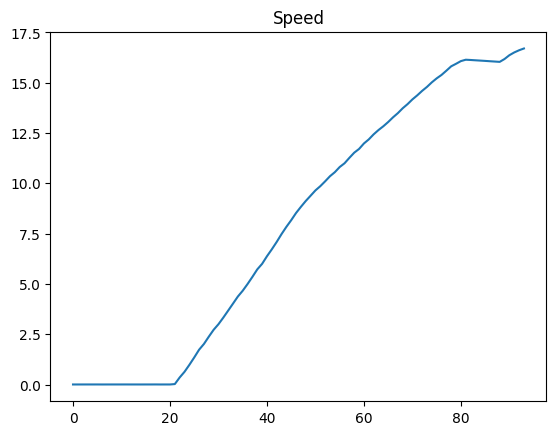

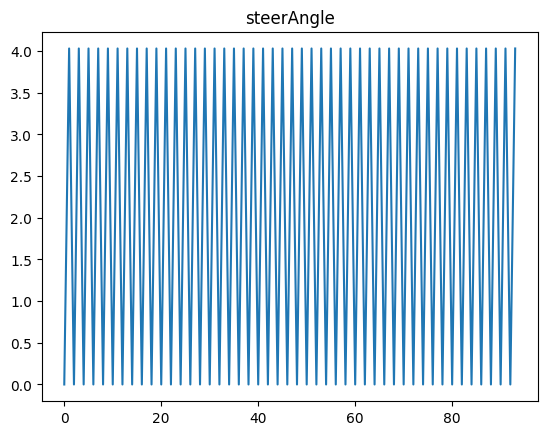

In [8]:
plt.title("Speed")
plt.plot(df.speed)
plt.show()

plt.title("steerAngle")
plt.plot(df.steerAngle)
plt.show()